# Projekt 6: Przewidywanie struktury drugorzędowej RNA

In [1]:
# %pip install matplotlib pandas seaborn

In [2]:
import os
import random
from collections import defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

DatasetDirectory = Path("./resources/datasets")
ModelDirectory = Path("./resources/models")
ResultsDirectory = Path("./resources/results")
FiguresDirectory = Path("./resources/figures")

In [3]:
def split_datasets(
    path: Path, train_ratio: float = 0.7, valid_ratio: float = 0.15, test_ratio: float = 0.15
) -> None:
    random.seed(42)
    files = [f"{path}/{f}" for f in os.listdir(path) if f.endswith(".bpseq")]
    random.shuffle(files)

    total_files = len(files)
    train_count = int(total_files * train_ratio)
    valid_count = int(total_files * valid_ratio)

    train_files = files[:train_count]
    valid_files = files[train_count : train_count + valid_count]
    test_files = files[train_count + valid_count :]

    with open(f"{path}-train-bpseq.lst", "w") as f:
        f.write("\n".join(train_files))
    with open(f"{path}-valid-bpseq.lst", "w") as f:
        f.write("\n".join(valid_files))
    with open(f"{path}-test-bpseq.lst", "w") as f:
        f.write("\n".join(test_files))

    with open(f"{path}-train-fa.lst", "w") as f:
        f.write("\n".join(train_files).replace(".bpseq", ".fa"))
    with open(f"{path}-valid-fa.lst", "w") as f:
        f.write("\n".join(valid_files).replace(".bpseq", ".fa"))
    with open(f"{path}-test-fa.lst", "w") as f:
        f.write("\n".join(test_files).replace(".bpseq", ".fa"))


def datasets_sanity_check() -> None:
    lst_files = [file for file in os.listdir(DatasetDirectory) if file.endswith(".lst")]

    for file in lst_files:
        file_path = DatasetDirectory / file
        with open(file_path, "r") as f:
            lines = f.readlines()
        num_lines = len(lines)

        total_files = len(os.listdir(DatasetDirectory / file.split("-")[0])) // 2
        print(f"{file:<25} has {round(num_lines / total_files * 100)}% files ({num_lines})")

In [4]:
split_datasets(DatasetDirectory / "ArchiveII")
split_datasets(DatasetDirectory / "PDB")
datasets_sanity_check()

ArchiveII-train-fa.lst    has 70% files (2779)
PDB-train-fa.lst          has 70% files (413)
ArchiveII-test-bpseq.lst  has 15% files (596)
ArchiveII-test-fa.lst     has 15% files (596)
ArchiveII-valid-fa.lst    has 15% files (595)
PDB-valid-fa.lst          has 15% files (88)
PDB-valid-bpseq.lst       has 15% files (88)
PDB-test-bpseq.lst        has 15% files (89)
ArchiveII-train-bpseq.lst has 70% files (2779)
PDB-test-fa.lst           has 15% files (89)
ArchiveII-valid-bpseq.lst has 15% files (595)
PDB-train-bpseq.lst       has 70% files (413)


## ArchiveII Dataset

In [5]:
GpuCount: int = -1
EpochCount: int = 10

In [6]:
DatasetName = "ArchiveII"
Command = f"""
mxfold2 train \
  {DatasetDirectory}/{DatasetName}-train-bpseq.lst \
  --test-input {DatasetDirectory}/{DatasetName}-valid-bpseq.lst \
  --param {ModelDirectory}/{DatasetName}-model.pth \
  --save-config {ModelDirectory}/{DatasetName}-model.conf \
  --gpu {GpuCount} \
  --epoch {EpochCount}
"""
!{Command}

100%|█████████████████| 2779/2779 [07:20<00:00,  6.31it/s, train_loss=1.391e-01]
Train Epoch: 1	Loss: 0.139070	Time: 440.208s
100%|████████████████████| 595/595 [01:58<00:00,  5.03it/s, test_loss=1.363e-01]
Test Epoch: 1	Loss: 0.136262	Time: 118.305s
100%|█████████████████| 2779/2779 [07:19<00:00,  6.32it/s, train_loss=1.358e-01]
Train Epoch: 2	Loss: 0.135770	Time: 439.557s
100%|████████████████████| 595/595 [02:02<00:00,  4.86it/s, test_loss=1.336e-01]
Test Epoch: 2	Loss: 0.133605	Time: 122.331s
100%|█████████████████| 2779/2779 [07:18<00:00,  6.33it/s, train_loss=1.325e-01]
Train Epoch: 3	Loss: 0.132533	Time: 438.943s
100%|████████████████████| 595/595 [02:02<00:00,  4.85it/s, test_loss=1.310e-01]
Test Epoch: 3	Loss: 0.130950	Time: 122.644s
100%|█████████████████| 2779/2779 [07:21<00:00,  6.30it/s, train_loss=1.293e-01]
Train Epoch: 4	Loss: 0.129295	Time: 441.425s
100%|████████████████████| 595/595 [02:02<00:00,  4.86it/s, test_loss=1.282e-01]
Test Epoch: 4	Loss: 0.128228	Time: 122.4

In [7]:
DatasetName = "ArchiveII"
Command = f"""
mxfold2 predict \
  @./{ModelDirectory}/{DatasetName}-model.conf \
  {DatasetDirectory}/PDB-test-bpseq.lst \
  --bpseq {ResultsDirectory}/{DatasetName} \
  --result {ResultsDirectory}/{DatasetName}-results.csv \
  --gpu {GpuCount}
"""
!{Command}

## PDB Dataset

In [8]:
DatasetName = "PDB"
Command = f"""
mxfold2 train \
  {DatasetDirectory}/{DatasetName}-train-bpseq.lst \
  --test-input {DatasetDirectory}/{DatasetName}-valid-bpseq.lst \
  --param {ModelDirectory}/{DatasetName}-model.pth \
  --save-config {ModelDirectory}/{DatasetName}-model.conf \
  --gpu {GpuCount} \
  --epoch {EpochCount}
"""
!{Command}

100%|███████████████████| 413/413 [08:44<00:00,  1.27s/it, train_loss=1.378e-01]
Train Epoch: 1	Loss: 0.137833	Time: 524.242s
100%|██████████████████████| 88/88 [03:27<00:00,  2.36s/it, test_loss=1.439e-01]
Test Epoch: 1	Loss: 0.143882	Time: 207.284s
100%|███████████████████| 413/413 [08:51<00:00,  1.29s/it, train_loss=1.355e-01]
Train Epoch: 2	Loss: 0.135519	Time: 531.248s
100%|██████████████████████| 88/88 [03:14<00:00,  2.21s/it, test_loss=1.414e-01]
Test Epoch: 2	Loss: 0.141431	Time: 194.262s
100%|███████████████████| 413/413 [08:58<00:00,  1.30s/it, train_loss=1.333e-01]
Train Epoch: 3	Loss: 0.133310	Time: 538.607s
100%|██████████████████████| 88/88 [03:29<00:00,  2.38s/it, test_loss=1.388e-01]
Test Epoch: 3	Loss: 0.138836	Time: 209.353s
100%|███████████████████| 413/413 [08:52<00:00,  1.29s/it, train_loss=1.310e-01]
Train Epoch: 4	Loss: 0.131011	Time: 532.802s
100%|██████████████████████| 88/88 [03:25<00:00,  2.33s/it, test_loss=1.362e-01]
Test Epoch: 4	Loss: 0.136165	Time: 205.0

In [9]:
DatasetName = "PDB"
Command = f"""
mxfold2 predict \
  @./{ModelDirectory}/{DatasetName}-model.conf \
  {DatasetDirectory}/{DatasetName}-test-bpseq.lst \
  --bpseq {ResultsDirectory}/{DatasetName} \
  --result {ResultsDirectory}/{DatasetName}-results.csv \
  --gpu {GpuCount}
"""
!{Command}

## Transfer Learning (ArchiveII -> PDB)

In [10]:
DatasetName = "PDB"
Command = f"""
mxfold2 train \
  @./{ModelDirectory}/ArchiveII-model.conf \
  {DatasetDirectory}/{DatasetName}-train-bpseq.lst \
  --test-input {DatasetDirectory}/{DatasetName}-valid-bpseq.lst \
  --init-param {ModelDirectory}/ArchiveII-model.pth \
  --param {ModelDirectory}/TransferLearning-model.pth \
  --save-config {ModelDirectory}/TransferLearning-model.conf \
  --gpu {GpuCount} \
  --epoch {EpochCount}
"""
!{Command}

100%|███████████████████| 413/413 [08:35<00:00,  1.25s/it, train_loss=1.147e-01]
Train Epoch: 1	Loss: 0.114687	Time: 515.797s
100%|██████████████████████| 88/88 [03:16<00:00,  2.24s/it, test_loss=1.078e-01]
Test Epoch: 1	Loss: 0.107844	Time: 196.803s
100%|███████████████████| 413/413 [08:40<00:00,  1.26s/it, train_loss=1.099e-01]
Train Epoch: 2	Loss: 0.109882	Time: 520.655s
100%|██████████████████████| 88/88 [03:21<00:00,  2.29s/it, test_loss=1.048e-01]
Test Epoch: 2	Loss: 0.104850	Time: 201.515s
100%|███████████████████| 413/413 [08:49<00:00,  1.28s/it, train_loss=1.065e-01]
Train Epoch: 3	Loss: 0.106550	Time: 529.021s
100%|██████████████████████| 88/88 [03:22<00:00,  2.30s/it, test_loss=1.032e-01]
Test Epoch: 3	Loss: 0.103244	Time: 202.754s
100%|███████████████████| 413/413 [08:49<00:00,  1.28s/it, train_loss=1.039e-01]
Train Epoch: 4	Loss: 0.103909	Time: 529.830s
100%|██████████████████████| 88/88 [03:21<00:00,  2.29s/it, test_loss=1.016e-01]
Test Epoch: 4	Loss: 0.101631	Time: 201.7

In [11]:
DatasetName = "PDB"
Command = f"""
mxfold2 predict \
  @./{ModelDirectory}/TransferLearning-model.conf \
  {DatasetDirectory}/{DatasetName}-test-bpseq.lst \
  --bpseq {ResultsDirectory}/TransferLearning \
  --result {ResultsDirectory}/TransferLearning-results.csv \
  --gpu {GpuCount}
"""
!{Command}

## Results

In [3]:
columns: list[str] = [
    "filename",
    "sequence_length",
    "elapsed_time",
    "sc",
    "tp",
    "tn",
    "fp",
    "fn",
    "sen",
    "ppv",
    "fval",
    "mcc",
]

results = pd.read_csv(ResultsDirectory / "TransferLearning-results.csv", header=None, names=columns)
results.head()

,filename,sequence_length,elapsed_time,sc,tp,tn,fp,fn,sen,ppv,fval,mcc
0,resources/datasets/PDB/6ERI_1_AB.bpseq,106,0.005626,20.225124,23,5539,2,1,0.958333,0.920000,0.938776,0.938702
1,resources/datasets/PDB/1F1T_1_A.bpseq,33,0.000312,5.846609,10,518,0,0,1.000000,1.000000,1.000000,1.000000
2,resources/datasets/PDB/5WT1_1_C.bpseq,67,0.001731,22.036249,18,2191,0,2,0.900000,1.000000,0.947368,0.948251
3,resources/datasets/PDB/7DCO_1_B.bpseq,179,0.023004,36.309677,29,15857,27,18,0.617021,0.517857,0.563107,0.563871
4,resources/datasets/PDB/7CPU_1_S6.bpseq,75,0.002281,21.463169,16,2753,5,1,0.941176,0.761905,0.842105,0.845792


In [13]:
def calculate_metrics(results: pd.DataFrame) -> pd.DataFrame:
    """Calculate the metrics for the given results: INF, PPV, TPR, TNR."""
    tp_sum, tn_sum, fp_sum, fn_sum = results[["tp", "tn", "fp", "fn"]].sum()
    ppv = tp_sum / (tp_sum + fp_sum)
    tpr = tp_sum / (tp_sum + fn_sum)
    inf = (ppv * tpr) ** 0.5
    tnr = tn_sum / (tn_sum + fp_sum)
    return inf, ppv, tpr, tnr


def plot_metrics(datasets: tuple[str]) -> None:
    """Plot the metrics for the given results."""
    metrics = defaultdict(dict)
    for dataset in datasets:
        df = pd.read_csv(ResultsDirectory / f"{dataset}-results.csv", header=None, names=columns)
        inf, ppv, tpr, tnr = calculate_metrics(df)
        metrics["inf"].update({dataset: inf})
        metrics["ppv"].update({dataset: ppv})
        metrics["tpr"].update({dataset: tpr})
        metrics["tnr"].update({dataset: tnr})

    colors = sns.color_palette("magma", 3)
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
    ax1, ax2, ax3, ax4 = axs.flatten()

    ax1.set_title("INF")
    ax1.bar(metrics["inf"].keys(), metrics["inf"].values(), color=colors, label="INF")
    ax1.grid(axis="y", linestyle="--", alpha=0.25)
    ax1.set_xlabel("dataset")
    ax1.set_ylabel("score")

    ax2.set_title("PPV")
    ax2.bar(metrics["ppv"].keys(), metrics["ppv"].values(), color=colors, label="PPV")
    ax2.grid(axis="y", linestyle="--", alpha=0.25)
    ax2.set_xlabel("dataset")
    ax2.set_ylabel("score")

    ax3.set_title("TPR")
    ax3.bar(metrics["tpr"].keys(), metrics["tpr"].values(), color=colors, label="TPR")
    ax3.grid(axis="y", linestyle="--", alpha=0.25)
    ax3.set_xlabel("dataset")
    ax3.set_ylabel("score")

    ax4.set_title("TNR")
    ax4.bar(metrics["tnr"].keys(), metrics["tnr"].values(), color=colors, label="TNR")
    ax4.grid(axis="y", linestyle="--", alpha=0.25)
    ax4.set_xlabel("dataset")
    ax4.set_ylabel("score")

    fig.savefig(FiguresDirectory / "results.png")

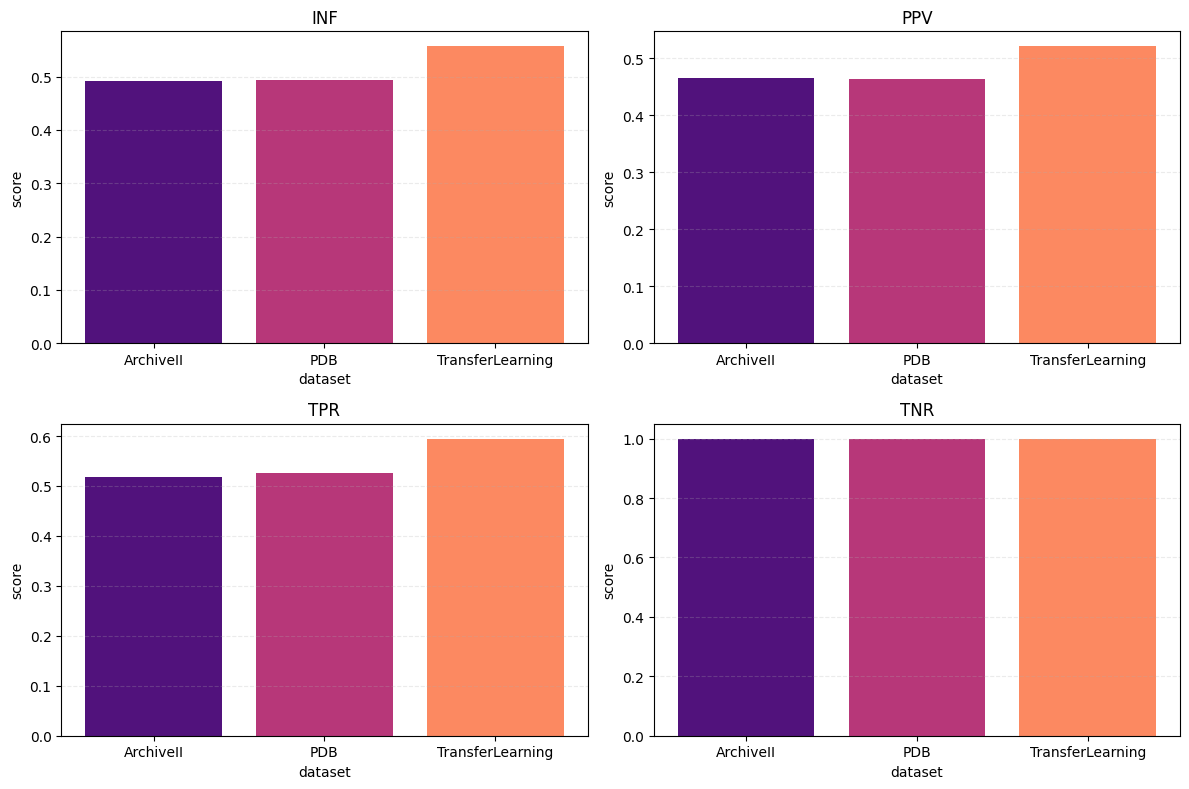

In [14]:
datasets = ("ArchiveII", "PDB", "TransferLearning")

plot_metrics(datasets)